In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 2

In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    './../Dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

Found 1800 images belonging to 2 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
    './../Dataset/valid',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 600 images belonging to 2 classes.


In [8]:
# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [15]:
# Create a new model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=8,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/8
56/56 [==============================] - 427s 8s/step - loss: 0.5573 - accuracy: 0.7025 - val_loss: 0.6157 - val_accuracy: 0.6597
Epoch 2/8
56/56 [==============================] - 393s 7s/step - loss: 0.5049 - accuracy: 0.7494 - val_loss: 0.5773 - val_accuracy: 0.7170
Epoch 3/8
56/56 [==============================] - 428s 8s/step - loss: 0.5043 - accuracy: 0.7387 - val_loss: 0.5743 - val_accuracy: 0.7031
Epoch 4/8
56/56 [==============================] - 619s 11s/step - loss: 0.4775 - accuracy: 0.7658 - val_loss: 0.5602 - val_accuracy: 0.7049
Epoch 5/8
56/56 [==============================] - 437s 8s/step - loss: 0.4688 - accuracy: 0.7562 - val_loss: 0.5339 - val_accuracy: 0.7257
Epoch 6/8
56/56 [==============================] - 204s 4s/step - loss: 0.4483 - accuracy: 0.7800 - val_loss: 0.5497 - val_accuracy: 0.7188
Epoch 7/8
56/56 [==============================] - 352s 6s/step - loss: 0.4506 - accuracy: 0.7805 - val_loss: 0.5923 - val_accuracy: 0.6823
Epoch 8/8
56/56 [==

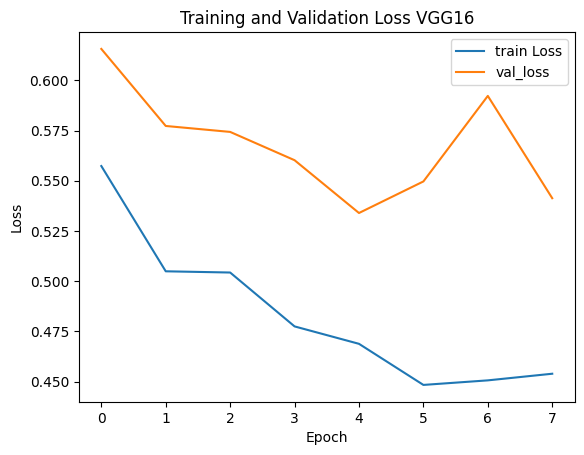

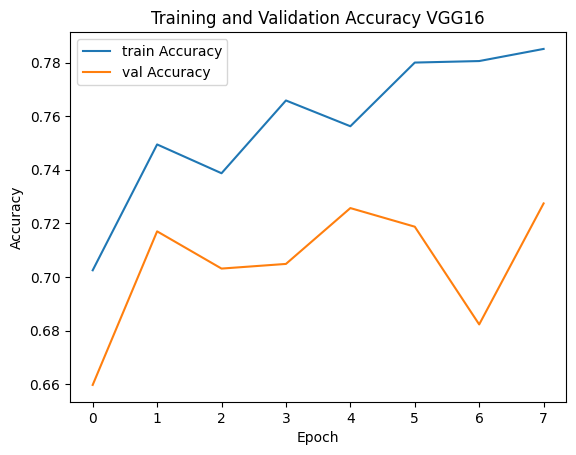

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss VGG16')
plt.savefig('./../Images/loss_plot_model1.png')
plt.show()

# Plot and save the accuracy plot
plt.plot(history.history['accuracy'], label='train Accuracy')
plt.plot(history.history['val_accuracy'], label='val Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy VGG16')
plt.savefig('./../Images/accuracy_plot_model1.png')
plt.show()